# Assignment A1 [35 marks]



The assignment consists of 4 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Linear Algebra [8 marks]

**1.1** Using the method of your choice, solve the linear system $Ax = b$ with

$$ A = \begin{pmatrix}
          1 &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{and} \qquad 
    b = \begin{pmatrix}
           5.2 \cr 0.1 \cr 1.9 \cr 0
        \end{pmatrix},
$$

and compute the residual norm $r = \|Ax-b\|_2$. Display the value of $r$ in a clear and easily readable manner.

**[2 marks]**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A =np.array([[1,1,0,1],[-1,0,1,1],[0,-1,0,-1],[1,0,1,0]],dtype =np.float64)#setting up A and b that can hold float elements inside
b =np.array([[5.2],[0.1],[1.9],[0]],dtype =np.float64)
def solution(MatrixA,MatrixB):
    solve =np.linalg.solve(MatrixA,MatrixB)
    RMatrix =np.dot(MatrixA,solve)-MatrixB
    r = np.linalg.norm(RMatrix,ord=2)
    print("the residual norm r is ",r)
solution(A,b)

the residual norm r is  3.951150228630004e-15


**1.2** Repeat the same calculations for the matrix

$$ A = \begin{pmatrix}
          a &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{with} \qquad a \in \{10^{-8}, 10^{-10}, 10^{-12}\}. 
$$

Display the value of $r$ for each value of $a$, and avoid repeating (copy+pasting) code.

**[3 marks]**

In [2]:
def DifferentR(MatrixA,MatrixB,values =[10**-8,10**-10,10**-12]):## replacing the original element in Matrix A to the target data
    for value in values:
        MatrixA[0,0] =value
        print("for a =",MatrixA[0,0])
        solution(MatrixA,MatrixB)
        print('\n')
DifferentR(A,b,values =[10**-8,10**-10,10**-12])

for a = 1e-08
the residual norm r is  3.337860105534496e-07


for a = 1e-10
the residual norm r is  1.4950498918170794e-05


for a = 1e-12
the residual norm r is  0.0019918044974970082




**1.3** Summarise and explain your observations in a discussion of no more than $250$ words.

**[3 marks]**

📝 ***Discussion for question 1.3***

The way to fix the problem:

For 1.1 using the code np.linalg.norm to calculate the residual norm r

For 1.2 replacing the original element in Matrix A to the target data and then solving the problem by using the function coded above.

Observations:

1.The value of r should be always be 0 but according to the results shown above,they all have errors in different values.

2.The value of r goes smaller as the value of A becomes larger, and it shows that the value obtained by solving the equation will be more accurate as the value of A increase.



---
## Question 2: Sums [10 marks]

Consider the sum

$$
S_N = \sum_{n=1}^N \frac{2n+1}{n^2(n+1)^2}.
$$

**2.1** Write a function `sum_S()` which takes 2 input arguments, a positive integer `N` and a string `direction`, and computes the sum $S_N$ **iteratively** (i.e. using a loop):
- in the direction of increasing $n$ if `direction` is `'up'`,
- in the direction of decreasing $n$ if `direction` is `'down'`.

For instance, to calculate $S_{10}$ in the direction of decreasing $n$, you would call your function using `sum_S(10, 'down')`.

**[3 marks]**

In [3]:
import matplotlib.pyplot as plt 
def Sum_s(N,direction):
    if direction=='up':
        i,iN,step=[1,N+1,1]
    if direction=='down':
        i,iN,step=[N,0,-1]
    SN=0 #initialize the sum
    for n in range(i,iN,step):
        SN+=(2*n+1)/(n**2*((n+1)**2))
    return SN  
## Testing 
SN=Sum_s(10,'down')
print("the sum Sn is",SN)

the sum Sn is 0.9917355371900827


**2.2** The sum $S_N$ has the closed-form expression $S_N = 1-\frac{1}{(N+1)^2}$. We assume that we can compute $S_N$ using this expression without significant loss of precision, i.e. that we can use this expression to obtain a "ground truth" value for $S_N$.

Using your function `sum_S()`, compute $S_N$ iteratively in both directions, for 10 different values of $N$, linearly spaced, between $10^3$ and $10^6$ (inclusive).

For each value of $N$, compare the results in each direction with the closed-form expression. Present your results graphically, in a clear and understandable manner.

**[4 marks]**

In [11]:
i2_2 =10**3
iN2_2 =10**6
number =10
step =int((iN2_2-i2_2)/(number-1))
result =[]
for N in range(i2_2,iN2_2+1,step):
    ClosedForm = 1-1/(N+1)**2
    SNUp =Sum_s(N,'up')
    SNDown =Sum_s(N,'down')
    GapUp=ClosedForm -SNUp
    GapDown=ClosedForm -SNDown
    print("for N=",N)
    print("the closed-form expression is:",ClosedForm)
    print("SNup :",SNUp,"   GapUp:",GapUp)
    print("SNdown:",SNDown, " GapDown:",GapDown)
    result.append([N, ClosedForm, SNDown, SNUp, GapDown, GapUp])
    print('\n')
##Next cell is also code for 2.2

for N= 1000
the closed-form expression is: 0.999999001997004
SNup: 0.9999990019970034 GapUp: 5.551115123125783e-16
SNdown : 0.999999001997004  GapDown: 0.0


for N= 112000
the closed-form expression is: 0.999999999920282
SNup: 0.999999999920272 GapUp: 9.992007221626409e-15
SNdown : 0.999999999920282  GapDown: 0.0


for N= 223000
the closed-form expression is: 0.9999999999798912
SNup: 0.999999999980058 GapUp: -1.667554982986985e-13
SNdown : 0.9999999999798912  GapDown: 0.0


for N= 334000
the closed-form expression is: 0.999999999991036
SNup: 0.9999999999926349 GapUp: -1.5989432000651504e-12
SNdown : 0.999999999991036  GapDown: 0.0


for N= 445000
the closed-form expression is: 0.9999999999949502
SNup: 0.9999999999926349 GapUp: 2.3152590955533014e-12
SNdown : 0.9999999999949502  GapDown: 0.0


for N= 556000
the closed-form expression is: 0.9999999999967651
SNup: 0.9999999999926349 GapUp: 4.130251696210507e-12
SNdown : 0.9999999999967653  GapDown: -1.1102230246251565e-16


for N= 667000


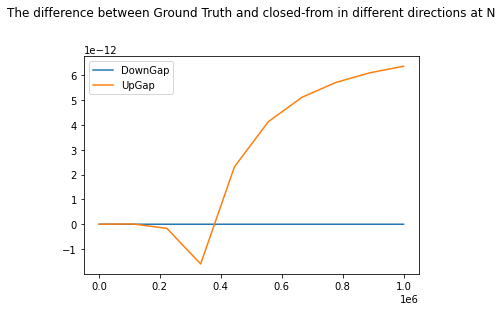

In [12]:
##The graph of 2.2
AxisX =[i[0] for i in result]
Down=[i[4] for i in result]
Up=[i[5] for i in result]

plt.title('The difference between Ground Truth and closed-from in different directions at N',pad=40,fontdict={'weight':'normal','size': 15})
plt.plot(AxisX, Down,label='DownGap')
plt.plot(AxisX, Up,label='UpGap')
plt.legend()
plt.show()

**2.3** Describe and explain your findings in no more that $250$ words. Which direction of summation provides the more accurate result? Why?

**[3 marks]**

📝 ***Discussion for question 2.3***

Summarise:
    
S_N in the direction of decreasing n will provide a more accurate result

Explain:
    
The value of item decreases as the value of n increases.When S_N takes down direction, the small value will not be ignored but will be added to the large value. In contrast, if S_N takes up direction, the subsequent small values will be ignored when large values are adding together to small values, leading to the accumulation of errors.



---
## Question 3: Numerical Integration [10 marks]

For integer $k \neq 0$ consider the integral 

$$
I(k) = \int_0^{2\pi}  x^4 \cos{k x} \ dx = \frac{32\pi^3}{k^2} - \frac{48\pi}{k^4} \ .
$$

**3.1** Write a function `simpson_I()` which takes 2 input arguments, `k` and `N`, and implements Simpson's rule to compute and return an approximation of $I(k)$, partitioning the interval $[0, 2\pi]$ into $N$ sub-intervals of equal width.

**[2 marks]**

In [3]:
import numpy as np
def simpson_I(k, N):
    def integ(x):
        return (x**4)*np.cos(k*x)
    h = (2*np.pi-0) / N #h=(upper bound-lower bound)/subinterval number
    Ik=integ(0)+integ(2*np.pi) # calculate the exact value of this integral
    A=np.arange(2,N,2)*h
    B=np.arange(1,N,2)*h
    Ik+=2*np.sum(integ(A))
    Ik+=4*np.sum(integ(B))
    Ik*=h/3        
    return Ik
#Testing
print('the apporximation of I(K) is')
simpson_I(1,100)

the apporximation of I(K) is


841.4041615818907

**3.2** For $k = 1$, and for $\varepsilon \in \{10^{-n} \ |\  n \in \mathbb{N}, 3 \leqslant n \leqslant 8\}$, determine the number $N_{\text{min}}$ of partitions needed to get the value of the integral $I(1)$ correctly to within $\varepsilon$. 

**[2 marks]**

In [4]:
# the initial condition is k=1
def GroundTruth(k):
    integral = 32 *(np.pi**3) / (k**2) - 48 * np.pi / (k**4)
    return integral
    
epsilon = np.array([1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])

def NAgainstE(k, epsilon,choice=True):
    N = 2 #The composite simpson's rule work on the initial condition of n>2
    i = 0
    Nmin = []
    while True: # Using a while loop to count the total number of Nmin that satisfy the condition.
        if np.abs(GroundTruth(k) - simpson_I(k, N)) < epsilon[i]: # Judgement formula 
            Nmin.append(N)
            if choice:
                print('ε=',epsilon[i],': Nmin = ',N)
            i += 1 #number of Nmin +1
            if i == len(epsilon): break
        else:
            N += 1
    Nmin = np.array(Nmin)
    return Nmin

NAgainstE(1, epsilon)

ε= 0.001 : Nmin =  72
ε= 0.0001 : Nmin =  126
ε= 1e-05 : Nmin =  224
ε= 1e-06 : Nmin =  396
ε= 1e-07 : Nmin =  704
ε= 1e-08 : Nmin =  1252


array([  72,  126,  224,  396,  704, 1252])

**3.3** Repeat your calculations from **3.2** for $k \in \{2^{n}\ |\ n \in \mathbb{N}, n \leqslant 6\}$. 

**[2 marks]**

In [6]:
SetK = [2, 4, 8, 16, 32, 64]
for k in SetK:
    print('When k = ',k)
    NAgainstE(k, epsilon)
    print()

When k =  2
ε= 0.001 : Nmin =  102
ε= 0.0001 : Nmin =  180
ε= 1e-05 : Nmin =  318
ε= 1e-06 : Nmin =  566
ε= 1e-07 : Nmin =  1006
ε= 1e-08 : Nmin =  1788
When k =  4
ε= 0.001 : Nmin =  144
ε= 0.0001 : Nmin =  254
ε= 1e-05 : Nmin =  452
ε= 1e-06 : Nmin =  802
ε= 1e-07 : Nmin =  1424
ε= 1e-08 : Nmin =  2534
When k =  8
ε= 0.001 : Nmin =  204
ε= 0.0001 : Nmin =  360
ε= 1e-05 : Nmin =  638
ε= 1e-06 : Nmin =  1134
ε= 1e-07 : Nmin =  2016
ε= 1e-08 : Nmin =  3584
When k =  16
ε= 0.001 : Nmin =  288
ε= 0.0001 : Nmin =  508
ε= 1e-05 : Nmin =  902
ε= 1e-06 : Nmin =  1604
ε= 1e-07 : Nmin =  2852
ε= 1e-08 : Nmin =  5070
When k =  32
ε= 0.001 : Nmin =  408
ε= 0.0001 : Nmin =  720
ε= 1e-05 : Nmin =  1278
ε= 1e-06 : Nmin =  2268
ε= 1e-07 : Nmin =  4032
ε= 1e-08 : Nmin =  7168
When k =  64
ε= 0.001 : Nmin =  584
ε= 0.0001 : Nmin =  1022
ε= 1e-05 : Nmin =  1808
ε= 1e-06 : Nmin =  3208
ε= 1e-07 : Nmin =  5702
ε= 1e-08 : Nmin =  10138


**3.3** Present your results graphically by plotting 

(a) the number of terms $N_{\text{min}}$ against $\varepsilon$ for fixed $k$, 

(b) the number of terms $N_{\text{min}}$ against $k$ for fixed $\varepsilon$.

You should format the plots so that the data presentation is clear and easy to understand.

**[2 marks]**

In [16]:
import matplotlib.pyplot as plt
def NAgainstK(k, epsilon,choice=True):
    N = 2
    i = 0
    Nmin = []
    while True: # Using a while loop to count the total number of Nmin that satisfy the condition.
        if np.abs(GroundTruth(k[i]) - simpson_I(k[i], N)) < epsilon:
            Nmin.append(N)
            if choice:
                print('k =',k[i],': N =',N)
            i += 1
            if i == len(k): break
        else:
            N += 1
    Nmin = np.array(Nmin)
    return Nmin

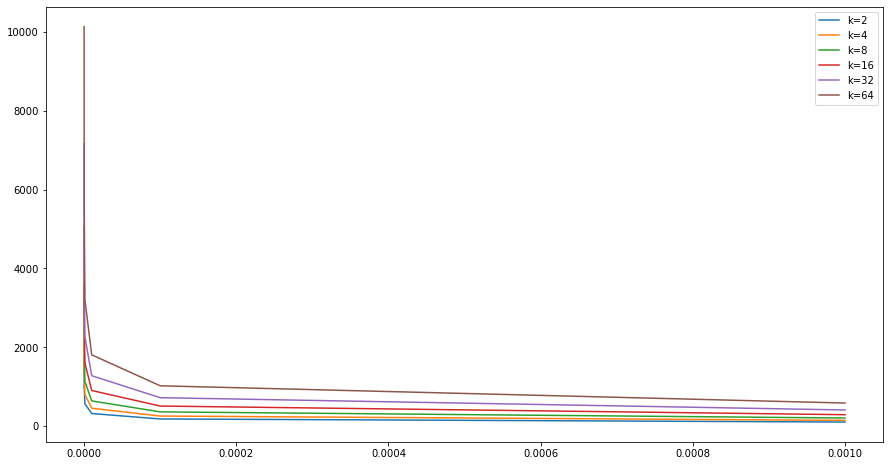

In [17]:
#  3.3(a)
plt.figure(figsize=(15,8))
X= np.array([1,2, 4, 8, 16, 32, 64])#k=1 will also be inclued in the plot.
epsilon = np.array([1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
for k in X:
    Y = NAgainstE(k, epsilon,choice=False)
    plt.plot(epsilon, Y, label=f'k={k}')
plt.title('the number of terms Nmin against ε for fixed k',pad=30,fontdict={'weight':'normal','size': 20})
plt.legend()
plt.show()

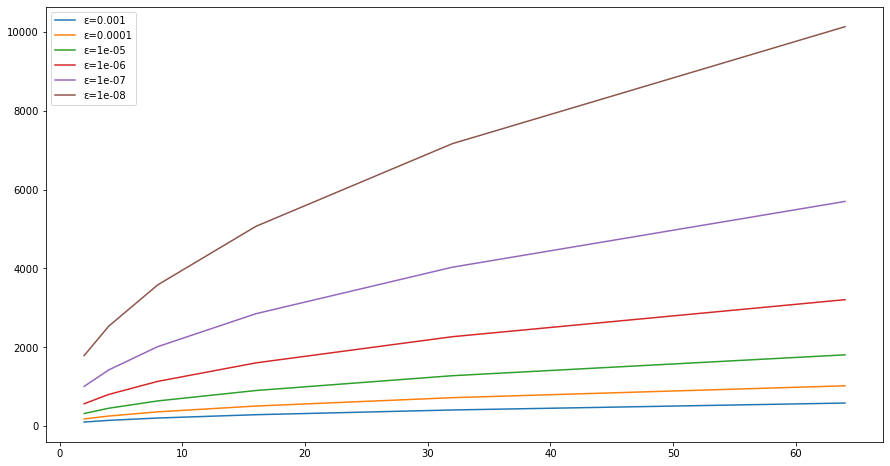

In [18]:
#  3.3(b)
plt.figure(figsize=(15,8))
for ε in epsilon:
    Y = NAgainstK(X, ε,choice=False)
    plt.plot(X, Y, label=f'ε={ε}')
plt.title('the number of terms Nmin against k for fixed ε',pad=30,fontdict={'weight':'normal','size': 20})
plt.legend()
plt.show()


**3.4** Discuss, with reference to your plot from 3.3, your results. Your answer should be no more than $250$ words.

**[2 marks]**

📝 ***Discussion for question 3.4***

Observation:

1.Larger k leads to larger Nmin.

2.Lower ε leads to larger Nmin.

Explaination:

The observation is relevant to the concept of composite simpson's rule: If it's possible to breaking up the interval [0,2π] into n>2 small subintervals. Simpson's rule is then applied to each subinterval, with the results being summed to produce an approximation for the integral over the entire interval.Observation 2 shows that the more sub-interval we break, the less difference between ground truth and the approximation will be.



---
## Question 4: Numerical Derivatives [7 marks]

Derivatives can be approximated by finite differences in several ways, for instance

\begin{align*}
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x)}{h} \\
        \frac{df}{dx} & \approx \frac{f(x) - f(x-h)}{h}  \\
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x-h)}{2h} \ . 
\end{align*}

Assuming $f$ to be differentiable, in the limit $h \to 0$, all three expressions are equivalent and exact, but for finite $h$ there are differences. Further discrepancies also arise when using finite precision arithmetic.

**4.1**
Estimate numerically the derivative of $f(x) = \cos(x)$ at $x = 1$ using the three expressions given above and different step sizes $h$. Use at least 50 logarithmically spaced values $h \in [10^{-16}, 10^{-1}]$.

**[2 marks]**

In [19]:
import numpy as np
# the initial condition is x=1
def f(x):
    return np.cos(x)
h = np.logspace(-16,-1,100)
f1 = (np.cos(1+h) -np.cos(1))/h
f2 = (np.cos(1) -np.cos(1-h))/h
f3 = (np.cos(1+h) -np.cos(1-h))/(2*h)
    
AbD1=abs(f1+np.sin(1))
AbD2=abs(f2+np.sin(1))
AbD3=abs(f3+np.sin(1))

**4.2**
Display the absolute difference between the numerical results and the
exact value of the derivative, against $h$ in a doubly logarithmic plot. 
You should format the plot so that the data presentation is clear and easy to understand.

**[2 marks]**

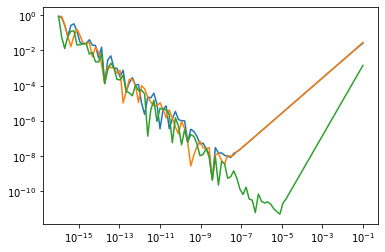

In [20]:
import matplotlib.pyplot as plt
plt.loglog(h,AbD1)
plt.loglog(h,AbD2)
plt.loglog(h,AbD3)
plt.show()

**4.3**
Describe and interpret your results in no more than 250 words.

*Hint: run the code below.*

**[3 marks]**

In [21]:
h = 1e-14
print(1 + h - 1)
print((1 + h - 1)/h)

9.992007221626409e-15
0.9992007221626409


📝 ***Discussion for question 4.3***

When h is very small, the absolute differences of all 3 formulae are almost 0.

For the first two formulae, their absolute differences with the exact value of derivative do not differ obviously. The reason for this may be due to the similarity of the method of differentiation, but one compares f at x and a point at its right side, one compares f at x and a point at its left side.

For the third formula, it compares f at two points at 2 sides of x. Therefore when h increases, the value of f(h) becomes obvious and it times two compared with the first two formulae, thus the absolute difference will continuously increase.

